In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("citrus.csv")

print("Primeiras linhas do dataset:")
print(df.head())
print("\nInformações sobre o dataset:")
print(df.info())
print("\nEstatísticas")
print(df.describe())

Primeiras linhas do dataset:
     nome  diametro   peso  vermelho  verde  azul
0  orange      2.96  86.76       172     85     2
1  orange      3.91  88.05       166     78     3
2  orange      4.42  95.17       156     81     2
3  orange      4.47  95.60       163     81     4
4  orange      4.48  95.76       161     72     9

Informações sobre o dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   nome      10000 non-null  object 
 1   diametro  10000 non-null  float64
 2   peso      10000 non-null  float64
 3   vermelho  10000 non-null  int64  
 4   verde     10000 non-null  int64  
 5   azul      10000 non-null  int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 468.9+ KB
None

Estatísticas
           diametro          peso      vermelho         verde          azul
count  10000.000000  10000.000000  10000.000000  10000.000000  

Continuando com o projeto das laranjas/toranjas agora deve calcular o coeficiente ângular e o linear para a reta da laranja e para a reta da toranja. Use a fórmula de mínimos quadrados para encontrar cada um.

In [20]:
laranja_data = df[df['nome'] == 'orange']

X_laranja = laranja_data['diametro'].values
Y_laranja = laranja_data['peso'].values
n_laranja = np.size(X_laranja)

a_laranja = (n_laranja * np.sum(X_laranja * Y_laranja) - np.sum(X_laranja) * np.sum(Y_laranja)) / (n_laranja * np.sum(X_laranja**2) - np.sum(X_laranja)**2)
b_laranja = np.mean(Y_laranja) - a_laranja * np.mean(X_laranja)

print("=== Coeficientes da Laranja ===")
print(f"Coeficiente angular (a): {a_laranja:.4f}")
print(f"Coeficiente linear (b): {b_laranja:.4f}")
print(f"Equação da reta: Y = {a_laranja:.4f}X + {b_laranja:.4f}")

=== Coeficientes da Laranja ===
Coeficiente angular (a): 14.7997
Coeficiente linear (b): 27.3856
Equação da reta: Y = 14.7997X + 27.3856


In [21]:
toranja_data = df[df['nome'] == 'grapefruit']

X_toranja = toranja_data['diametro'].values
Y_toranja = toranja_data['peso'].values
n_toranja = np.size(X_toranja)

a_toranja = (n_toranja * np.sum(X_toranja * Y_toranja) - np.sum(X_toranja) * np.sum(Y_toranja)) / (n_toranja * np.sum(X_toranja**2) - np.sum(X_toranja)**2)
b_toranja = np.mean(Y_toranja) - a_toranja * np.mean(X_toranja)

print("=== Coeficientes da Toranja ===")
print(f"Coeficiente angular (a): {a_toranja:.4f}")
print(f"Coeficiente linear (b): {b_toranja:.4f}")
print(f"Equação da reta: Y = {a_toranja:.4f}X + {b_toranja:.4f}")

=== Coeficientes da Toranja ===
Coeficiente angular (a): 15.7088
Coeficiente linear (b): 17.0071
Equação da reta: Y = 15.7088X + 17.0071


### Análise de gráficos

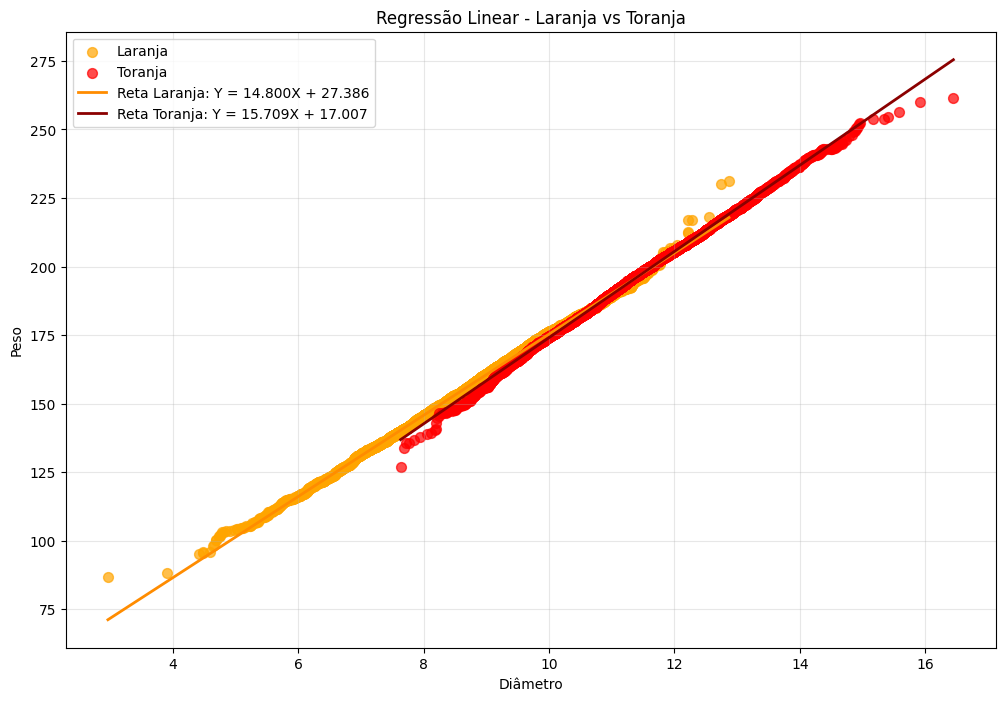

In [22]:
plt.figure(figsize=(12, 8))

plt.scatter(X_laranja, Y_laranja, color='orange', alpha=0.7, label='Laranja', s=50)
plt.scatter(X_toranja, Y_toranja, color='red', alpha=0.7, label='Toranja', s=50)

x_range_laranja = np.linspace(X_laranja.min(), X_laranja.max(), 100)
y_pred_laranja = a_laranja * x_range_laranja + b_laranja

x_range_toranja = np.linspace(X_toranja.min(), X_toranja.max(), 100)
y_pred_toranja = a_toranja * x_range_toranja + b_toranja

# plotando as retas
plt.plot(x_range_laranja, y_pred_laranja, color='darkorange', linewidth=2, 
         label=f'Reta Laranja: Y = {a_laranja:.3f}X + {b_laranja:.3f}')
plt.plot(x_range_toranja, y_pred_toranja, color='darkred', linewidth=2, 
         label=f'Reta Toranja: Y = {a_toranja:.3f}X + {b_toranja:.3f}')

plt.xlabel('Diâmetro')
plt.ylabel('Peso')
plt.title('Regressão Linear - Laranja vs Toranja')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()